<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Keras_Heart_attack_prediction_early_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart disease Prediction using Deep neural network**




















## **Context**


---
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



## **Problem Statement**:

---



To predict if the patient will have a heart disease or not





## **Attribute Information :**

|Features|Description|
|-----|-----|
|1. age|(in years)|
|2. sex:| (1 = male; 0 = female)|
|3. cp: | chest pain type|
|4. trestbps:| resting blood pressure (in mm Hg on admission to the                     | hospital)|
|5. chol:    |    serum cholestoral in mg/dl|
|6. fbs:     |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|7. restecg: | resting electrocardiographic results|
|8. thalach: | maximum heart rate achieved |
|9. exang:   |exercise induced angina (1 = yes; 0 = no)
|10. oldpeak:|ST depression induced by exercise relative to rest|
|11. slope:  |the slope of the peak exercise ST segment|
|12. ca:     |number of major vessels (0-3) colored by flourosopy|
|13. thal:   |3 = normal; 6 = fixed defect; 7 = reversable defect|
|14. target: | 1 or 0                                            |

## **Importing All Required Libraries**

---






In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1DX_YWv-xPm-bluniDSNcglxfgvWnz3qD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('heart.csv')

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Find unique values

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='int64':
                print(f'{column}: {df[column].unique()}')

In [ ]:

#print_unique_col_values(df)

In [ ]:
df.shape

(1025, 14)

#Get dummmies for various variables

In [ ]:
df = pd.concat([df,pd.get_dummies(df['sex'],prefix="sex")],axis=1)
df.drop('sex', axis=1, inplace=True)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_0,sex_1
0,52,0,125,212,0,1,168,0,1.00,2,2,3,0,0,1
1,53,0,140,203,1,0,155,1,3.10,0,0,3,0,0,1
2,70,0,145,174,0,1,125,1,2.60,0,0,3,0,0,1
3,61,0,148,203,0,1,161,0,0.00,2,1,3,0,0,1
4,62,0,138,294,1,1,106,0,1.90,1,3,2,0,1,0


In [ ]:
df.shape

(1025, 15)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['cp'],prefix="cp")],axis=1)
df.drop('cp', axis=1, inplace=True)



df = pd.concat([df,pd.get_dummies(df['fbs'],prefix="fbs")],axis=1)
df.drop('fbs', axis=1, inplace=True)


df = pd.concat([df,pd.get_dummies(df['restecg'],prefix="restecg")],axis=1)
df.drop('restecg', axis=1, inplace=True)




df = pd.concat([df,pd.get_dummies(df['exang'],prefix="exang")],axis=1)
df.drop('exang', axis=1, inplace=True)




df = pd.concat([df,pd.get_dummies(df['slope'],prefix="slope")],axis=1)
df.drop('slope', axis=1, inplace=True)



df = pd.concat([df,pd.get_dummies(df['ca'],prefix="ca")],axis=1)
df.drop('ca', axis=1, inplace=True)


df = pd.concat([df,pd.get_dummies(df['thal'],prefix="thal")],axis=1)
df.drop('thal', axis=1, inplace=True)

In [ ]:
df.shape

(1025, 31)

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.10,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.60,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.00,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.90,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Balance or imbalance

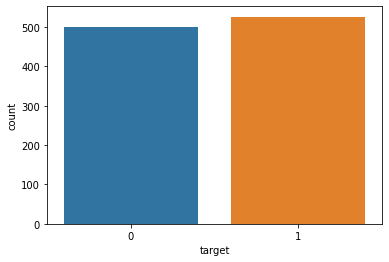

In [ ]:
sns.countplot(x ='target', data = df)
plt.show()

In [ ]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
x_columns = df.columns.drop('target')
X = df[x_columns].values
y = df['target'].values

In [ ]:
X.shape

(1025, 30)

In [ ]:
y.shape

(1025,)

In [ ]:
# if using softmax
#y = to_categorical(y)
#y.shape

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

# Data split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Define model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#model = Sequential()
#model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
#model.add(Dense(100, activation="relu"))
#model.add(Dense(50, activation="relu"))
#model.add(Dense(2, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 250)               25250     
                                                                 
 dense_3 (Dense)             (None, 350)               87850     
                                                                 
 dense_4 (Dense)             (None, 150)               52650     
                                                                 
 dense_5 (Dense)             (None, 2)                 302       
                                                                 
Total params: 179,252
Trainable params: 179,252
Non-trai

## Compile model

In [ ]:
#Sparse categorical cross entropy

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the model

In [ ]:
#history = model.fit(X_train, y_train, epochs=300, batch_size=64)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 11ms/step - loss: 3.8013 - accuracy: 0.5341 - val_loss: 0.6251 - val_accuracy: 0.6488
Epoch 2/300
26/26 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6317 - val_loss: 0.5645 - val_accuracy: 0.6732
Epoch 3/300
26/26 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.6915 - val_loss: 0.6577 - val_accuracy: 0.6293
Epoch 4/300
26/26 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.6854 - val_loss: 0.6084 - val_accuracy: 0.6488
Epoch 5/300
26/26 [==============================] - 0s 5ms/step - loss: 0.7465 - accuracy: 0.5866 - val_loss: 0.6760 - val_accuracy: 0.6780
Epoch 6/300
26/26 [==============================] - 0s 5ms/step - loss: 0.6390 - accuracy: 0.6646 - val_loss: 0.6424 - val_accuracy: 0.6098
Epoch 7/300
26/26 [==============================] - 0s 5ms/step - loss: 0.5812 - accuracy: 0.6707 - val_loss: 0.5924 - val_accuracy: 0.6732
Epoch 8/300


## Plot acc and loss

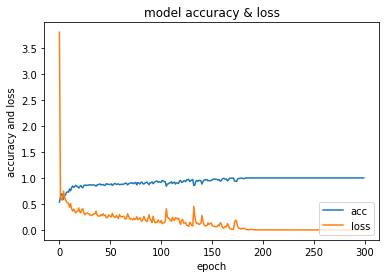

In [ ]:
#Visualize the models accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

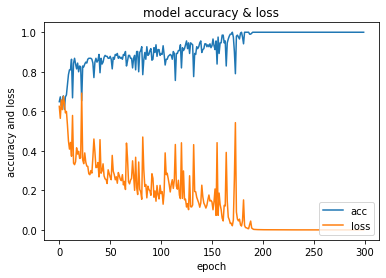

In [ ]:
#Visualize the model val accuracy and val loss
import matplotlib.pyplot as plt

plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

# Calculate prediction

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 5.1383e-05 - accuracy: 1.0000


[5.138250708114356e-05, 1.0]

In [ ]:
#pred_test= model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 1.0% 
 Error on test data: 0.0


In [ ]:
#Shape
y_test.shape
y_pred.shape

(205, 2)

# Confusion matrix

*   Converting predictions to label





In [ ]:
# argmax only for predictions as y_test is in 1D and predictions are in 2D

y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(205,)

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[ 97   0]
 [  0 108]]


In [ ]:
rep = classification_report(y_test, y_pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       108

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# Early Stopping

There are a number of parameters that are specified to the **EarlyStopping** object.

* **min_delta** This value should be kept small. It simply means the minimum change in error to be registered as an improvement.  Setting it even smaller will not likely have a great deal of impact.
* **patience** How long should the training wait for the validation error to improve?  
* **verbose** How much progress information do you want?
* **mode** In general, always set this to "auto".  This allows you to specify if the error should be minimized or maximized.  Consider accuracy, where higher numbers are desired vs log-loss/RMSE where lower numbers are desired.
* **restore_best_weights** This should always be set to true.  This restores the weights to the values they were at when the validation set is the highest.  Unless you are manually tracking the weights yourself (we do not use this technique in this course), you should have Keras perform this step for you.

As you can see from above, the entire number of requested epochs were not used.  The neural network training stopped once the validation set no longer improved.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

#Put previous run in comments first
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,
        verbose=1, mode='auto', restore_best_weights=True)


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),
        callbacks=[monitor],verbose=2,epochs=300)

Epoch 1/300
26/26 - 0s - loss: 2.3914e-05 - accuracy: 1.0000 - val_loss: 4.8198e-05 - val_accuracy: 1.0000 - 153ms/epoch - 6ms/step
Epoch 2/300
26/26 - 0s - loss: 2.3158e-05 - accuracy: 1.0000 - val_loss: 4.7583e-05 - val_accuracy: 1.0000 - 106ms/epoch - 4ms/step
Epoch 3/300
26/26 - 0s - loss: 2.2236e-05 - accuracy: 1.0000 - val_loss: 4.8021e-05 - val_accuracy: 1.0000 - 118ms/epoch - 5ms/step
Epoch 4/300
26/26 - 0s - loss: 2.1942e-05 - accuracy: 1.0000 - val_loss: 4.5446e-05 - val_accuracy: 1.0000 - 115ms/epoch - 4ms/step
Epoch 5/300
26/26 - 0s - loss: 2.1536e-05 - accuracy: 1.0000 - val_loss: 4.4271e-05 - val_accuracy: 1.0000 - 129ms/epoch - 5ms/step
Epoch 6/300
Restoring model weights from the end of the best epoch: 1.
26/26 - 0s - loss: 2.1181e-05 - accuracy: 1.0000 - val_loss: 4.3772e-05 - val_accuracy: 1.0000 - 121ms/epoch - 5ms/step
Epoch 6: early stopping


In [ ]:
y_pred_early = model.predict(X_test)

y_pred_early = np.argmax(y_pred_early,axis=1)
#expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(y_test,y_pred_early)
print(f"Accuracy: {correct}")

7/7 [==============================] - 0s 2ms/step
Accuracy: 1.0
